# Introduction to Radiative Transfer

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sp 

In [3]:
h = 6.63e-34
c = 3e+8
k = 1.38e-23
sigma = 5.67e-8 # [W M^-2 K^-4]

In [4]:
def BlackBodyWavenumberDensity(wavenumber, T):
    frequency = wavenumber * c
    prefactor = 2 * h * frequency**3 / c**2 
    exponential = np.exp(h*frequency / (k*T)) - 1
    return prefactor / exponential * c # Final factor of C comes from the change of the differential term. 
def BlackBodyWavenumberEnergy(LowerWN, UpperWN, T):
    UpperBound = UpperWN
    result, _ = sp.quad(BlackBodyWavenumberDensity, LowerWN, UpperBound, args=(T,))
    return result 

In [5]:
# def BlackBodyWavelengthDensity(wavenumber, T):
#     B = 2 * h * wavenumber **3 * c**-2 / ((np.exp((h * f) / (k * T)) - 1)) * 
#     return B
# def BlackBodyWavelengthEnergy(LowerWN, UpperWN, T):
#     Lower = 10e-12
#     Upper = 3000000
#     nu = np.linspace(Lower, Upper, 5000)
#     result, _ = sp.quad(BlackBody, Lower, Upper, args=(T,))
#     return result

<>:12: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\.'
C:\Users\harry\AppData\Local\Temp\ipykernel_6928\3764236142.py:12: SyntaxWarning: invalid escape sequence '\.'
  plt.ylabel('Flux Density $W\.m^{-2}\.sr^{-1}m$')


Text(0, 0.5, 'Flux Density $W\\.m^{-2}\\.sr^{-1}m$')

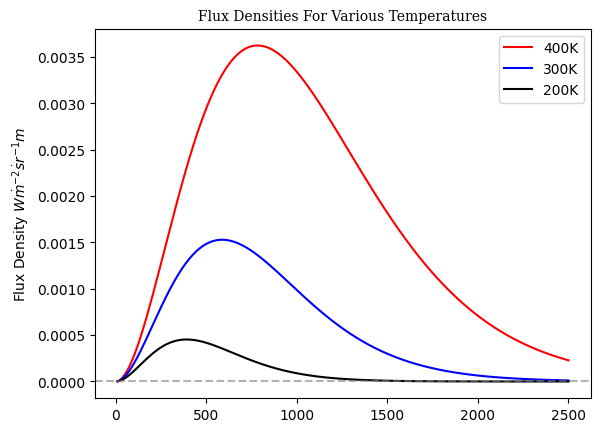

In [6]:
wns = np.linspace(1000, 250000, 1000)
wncms = wns / 100
BB400 = BlackBodyWavenumberDensity(wavenumber = wns, T = 400)
BB300 = BlackBodyWavenumberDensity(wavenumber = wns, T = 300)
BB200 = BlackBodyWavenumberDensity(wavenumber = wns, T = 200)
plt.plot(wncms, BB400, label = '400K', color = 'red')#, linewidth = 3)
plt.plot(wncms, BB300, label = '300K', color = 'blue')#, linewidth = 3)
plt.plot(wncms, BB200, label = '200K', color = 'black')#, linewidth = 3)
plt.legend()
plt.title('Flux Densities For Various Temperatures', font = 'serif')
plt.axhline(0, linestyle = '--', color = 'grey', alpha = 0.6)
plt.ylabel('Flux Density $W\.m^{-2}\.sr^{-1}m$')

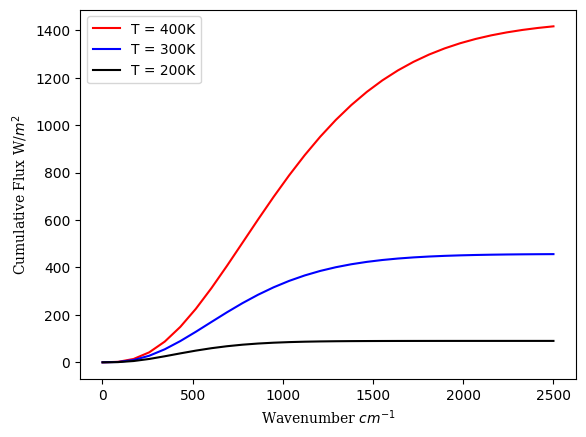

In [7]:
CDFnu = np.linspace(110, 250000, 30)
CDF400, CDF300, CDF200 = [], [], []
for i in range(30):
    CDF400.append(BlackBodyWavenumberEnergy(100, CDFnu[i], 400) * np.pi)
    CDF300.append(BlackBodyWavenumberEnergy(100, CDFnu[i], 300) * np.pi)
    CDF200.append(BlackBodyWavenumberEnergy(100, CDFnu[i], 200) * np.pi)
plt.plot(CDFnu / 100, CDF400, label = 'T = 400K', color = 'red')
plt.plot(CDFnu / 100, CDF300, label = 'T = 300K', color = 'blue') 
plt.plot(CDFnu / 100, CDF200, label = 'T = 200K', color = 'black')
plt.ylabel('Cumulative Flux W/$m^2$', font = 'serif')
plt.xlabel('Wavenumber $cm^{-1}$', font = 'serif')
plt.legend()